In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"
rcParams["xtick.top"] = True
rcParams["ytick.right"] = True

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
benchmark = pd.read_csv("results/benchmark.csv")

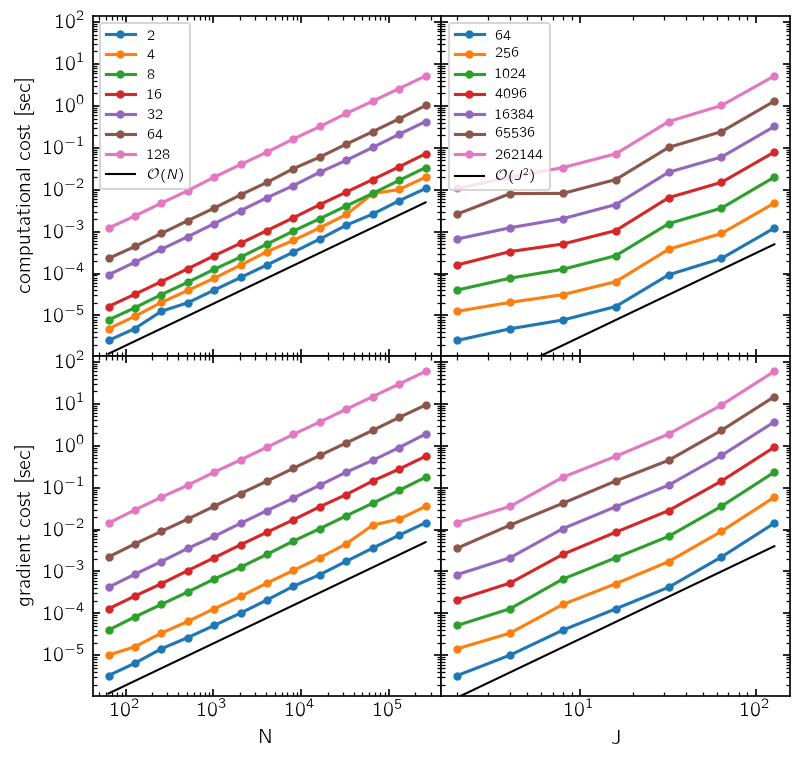

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)
for j in benchmark.J.unique():
    subset = benchmark[benchmark.J == j]
    subset = subset.groupby("N").min()
    
    ax = axes[0, 0]
    x = subset.index
    y = subset.time
    ax.plot(x, y, ".-", label="{0:.0f}".format(j))
    
    ax = axes[1, 0]
    y = subset.grad_time
    ax.plot(x, y, ".-")
    
for n in benchmark.N.unique()[::2]:
    subset = benchmark[benchmark.N == n]
    subset = subset.groupby("J").min()
    
    ax = axes[0, 1]
    x = subset.index
    y = subset.time
    ax.plot(x, y, ".-", label="{0:.0f}".format(n))
    
    ax = axes[1, 1]
    y = subset.grad_time
    ax.plot(x, y, ".-")
    
for ax in axes.flat:
    ax.set_xscale("log")
    ax.set_yscale("log")

ylim = axes[0, 0].get_ylim()

N = benchmark.N.unique()
axes[0, 0].plot(N, 5e-3 * N / N[-1], "k", label=r"$\mathcal{O}(N)$", lw=1)
axes[1, 0].plot(N, 5e-3 * N / N[-1], "k", label=r"$\mathcal{O}(N)$", lw=1)

J = benchmark.J.unique()
axes[0, 1].plot(J, 5e-4 * J**2 / J[-1]**2, "k", label=r"$\mathcal{O}(J^2)$", lw=1)
axes[1, 1].plot(J, 4e-3 * J**2 / J[-1]**2, "k", label=r"$\mathcal{O}(J^2)$", lw=1)

axes[0, 0].set_ylim(ylim)

axes[0, 0].legend(fontsize=7)
axes[0, 1].legend(fontsize=7)

axes[1, 0].set_xlabel("N")
axes[1, 1].set_xlabel("J")
axes[0, 0].set_ylabel("computational cost [sec]")
axes[1, 0].set_ylabel("gradient cost [sec]")

fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("paper/figure.pdf", bbox_inches="tight")